## Part 1


### 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
ds=pd.read_csv("Apps_data.csv")
ds=pd.DataFrame(ds)

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
ds.shape

(10841, 13)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [6]:
ds.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
ds.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


**We have to change data type of column Review & work on column Rating,Curr Ver and Android Ver as they are having missing data.**

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [8]:
ds=ds.drop_duplicates()

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [10]:
print(ds['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


**As we can see that '1.9' is irrelevent value in column Category. So we are dropping it.**

In [11]:
ds=ds[ds.Category!='1.9']
ds['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

**Here we can see that the irrelevent column has been dropped.**

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [13]:
ds['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

**Here we can see that there is nan values present in data.**

In [14]:
lst=list(ds[ds["Rating"].isnull()].index)

In [15]:
ds.drop(lst,inplace=True)

In [16]:
ds.shape

(8892, 13)

In [17]:
ds['Rating_category']=ds['Rating'].apply(lambda x: "high" if x>3.5 else "low")
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


In [18]:
dist=ds['Rating_category'].value_counts()
dist

high    8012
low      880
Name: Rating_category, dtype: int64

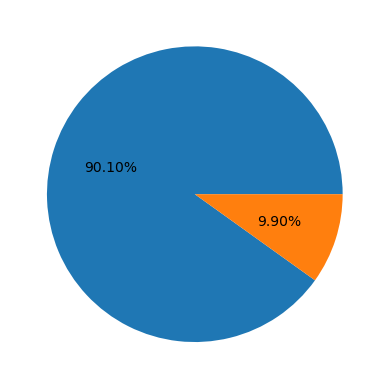

In [19]:
plt.pie(dist,autopct="%.2f%%")
plt.show()

**90.10% of Apps are having high rating and only 9.90% of Apps having low rating.**

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [20]:
ds.Reviews = pd.to_numeric(ds.Reviews)

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int64  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [22]:
z=np.abs(zscore(ds.Reviews))
z

0        0.162697
1        0.162419
2        0.132627
3        0.088517
4        0.162419
           ...   
10834    0.162750
10836    0.162739
10837    0.162751
10839    0.162713
10840    0.025636
Name: Reviews, Length: 8892, dtype: float64

In [23]:
threshold=3
ds=ds[z<threshold]
len(ds)

8800

### **9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')**

In [24]:
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [25]:
ds['Size']=ds['Size'].str.replace('M','e6')
ds['Size']=ds['Size'].str.replace('K','e6')
ds['Size']=pd.to_numeric(ds['Size'],errors="coerce")
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [26]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8800 non-null   object 
 1   Category         8800 non-null   object 
 2   Rating           8800 non-null   float64
 3   Reviews          8800 non-null   int64  
 4   Size             7120 non-null   float64
 5   Installs         8800 non-null   object 
 6   Type             8800 non-null   object 
 7   Price            8800 non-null   object 
 8   Content Rating   8800 non-null   object 
 9   Genres           8800 non-null   object 
 10  Last Updated     8800 non-null   object 
 11  Current Ver      8796 non-null   object 
 12  Android Ver      8798 non-null   object 
 13  Rating_category  8800 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.0+ MB


In [27]:
#Dropping null Entries
ds=ds[ds['Size'].notnull()]
ds.shape

(7120, 14)

In [28]:
ds.Size.isnull().sum()

0

### **10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.**

In [29]:
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [30]:
ds["Installs"]=ds["Installs"].replace({"\\,":"","\\+":""},regex=True)
ds["Installs"]=pd.to_numeric(ds.Installs,errors="coerce")
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7120 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7120 non-null   object 
 1   Category         7120 non-null   object 
 2   Rating           7120 non-null   float64
 3   Reviews          7120 non-null   int64  
 4   Size             7120 non-null   float64
 5   Installs         7120 non-null   int64  
 6   Type             7120 non-null   object 
 7   Price            7120 non-null   object 
 8   Content Rating   7120 non-null   object 
 9   Genres           7120 non-null   object 
 10  Last Updated     7120 non-null   object 
 11  Current Ver      7117 non-null   object 
 12  Android Ver      7118 non-null   object 
 13  Rating_category  7120 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 834.4+ KB


### **11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [31]:
ds.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49', '$7.49',
       '$1.50', '$19.99', '$15.99', '$33.99', '$39.99', '$2.49', '$4.49',
       '$1.70', '$1.49', '$3.88', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$15.46', '$8.99', '$3.04', '$13.99',
       '$4.29', '$3.28', '$4.60', '$1.00', '$10.99', '$2.90', '$1.97',
       '$2.56', '$1.20'], dtype=object)

In [32]:
ds["Price"]=ds["Price"].str.replace("$","")
ds.Price=pd.to_numeric(ds.Price)
ds.describe()

C:\Users\ADMIN 10\AppData\Local\Temp\ipykernel_564\3073945416.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ds["Price"]=ds["Price"].str.replace("$","")


,Rating,Reviews,Size,Installs,Price
count,7120.000000,7.120000e+03,7.120000e+03,7.120000e+03,7120.000000
mean,4.175393,1.730799e+05,2.325284e+07,6.229672e+06,1.083331
std,0.550749,7.459247e+05,2.315164e+07,3.359075e+07,17.449861
min,1.000000,1.000000e+00,1.000000e+06,1.000000e+00,0.000000
25%,4.000000,1.050000e+02,5.700000e+06,1.000000e+04,0.000000
50%,4.300000,2.249500e+03,1.500000e+07,1.000000e+05,0.000000
75%,4.500000,3.724100e+04,3.300000e+07,1.000000e+06,0.000000
max,5.000000,8.923847e+06,1.000000e+08,1.000000e+09,400.000000


In [33]:
ds.Price.dtype

dtype('float64')

### **12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)**

In [34]:
columnToDrop=['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver']
ds.drop(columnToDrop,axis=1,inplace=True)
ds.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,high


In [35]:
ds.isnull().sum()

Category           0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Rating_category    0
dtype: int64

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7120 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7120 non-null   object 
 1   Reviews          7120 non-null   int64  
 2   Size             7120 non-null   float64
 3   Installs         7120 non-null   int64  
 4   Type             7120 non-null   object 
 5   Price            7120 non-null   float64
 6   Content Rating   7120 non-null   object 
 7   Rating_category  7120 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 500.6+ KB


### **13. Encode the categorical columns.**

In [37]:
ds.describe(include=object)

,Category,Type,Content Rating,Rating_category
count,7120,7120,7120,7120
unique,33,2,6,2
top,FAMILY,Free,Everyone,high
freq,1563,6623,5679,6338


In [38]:
ds.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [39]:
ds.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [40]:
ds["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [41]:
ds=pd.get_dummies(ds,columns=(["Category","Type","Content Rating"]),drop_first=True)

In [42]:
ds["Rating_category"]=ds["Rating_category"].apply(lambda x:1 if x=="high" else 0)
ds.sample(5)

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
7709,8,6800000.0,500,0.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4175,231,5700000.0,5000,0.99,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3303,48211,7400000.0,1000000,0.00,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9540,848,25000000.0,100000,0.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4113,57,13000000.0,5000,0.00,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [43]:
ds.Rating_category.value_counts()

1    6338
0     782
Name: Rating_category, dtype: int64

### **14. Segregate the target and independent features (Hint: Use Rating_category as the target)**

In [44]:
x=ds.drop(["Rating_category"],axis=1)
x

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,967,14000000.0,500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,87510,8700000.0,5000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,215644,25000000.0,50000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,967,2800000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,881,2300000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,7,2600000.0,500,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,38,53000000.0,5000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,4,3600000.0,100,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
y=ds["Rating_category"]

### **15. Split the dataset into train and test.**

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=23)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4984, 42)
(2136, 42)
(4984,)
(2136,)


### **16. Standardize the data, so that the values are within a particular range.**

In [47]:
model=MinMaxScaler()
print(model)

MinMaxScaler()


In [48]:
ds2=pd.DataFrame(model.fit_transform(ds),columns=ds.columns)
ds2.head()

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.000018,0.181818,0.00001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000108,0.131313,0.00050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.009806,0.077778,0.00500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.024165,0.242424,0.05000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000108,0.018182,0.00010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
